In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

### Extract the crowdfunding.xlsx Data

In [3]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [4]:
# Get a summary of numerical columns in the crowdfunding_info DataFrame
crowdfunding_info_df.describe()


,cf_id,contact_id,goal,pledged,backers_count,launched_at,deadline
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1585.743000,3751.434000,43983.100000,42748.055000,727.005000,1.610955e+09,1.627459e+09
std,926.944534,1431.743284,58962.425595,57415.481551,1137.723135,1.330154e+07,9.072194e+06
min,23.000000,1235.000000,100.000000,0.000000,0.000000,1.579068e+09,1.609913e+09
25%,758.750000,2502.750000,4200.000000,5911.250000,86.000000,1.601507e+09,1.619672e+09
50%,1571.500000,3706.500000,8300.000000,11950.000000,184.500000,1.611554e+09,1.627232e+09
75%,2402.250000,4994.250000,80625.000000,66294.250000,923.750000,1.620018e+09,1.635224e+09
max,3209.000000,6234.000000,199200.000000,199110.000000,7295.000000,1.643695e+09,1.645596e+09


In [5]:
import matplotlib.pyplot as plt


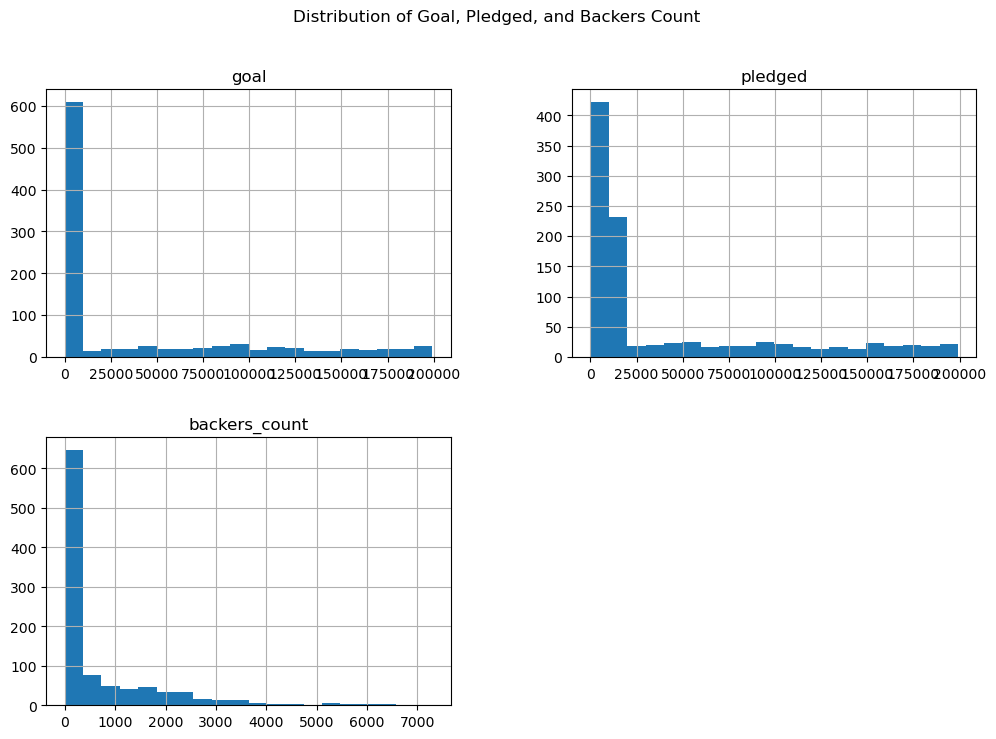

In [6]:
# Create a histogram to visualize the distribution of numerical columns in the dataset
crowdfunding_info_df[['goal', 'pledged', 'backers_count']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Goal, Pledged, and Backers Count")
plt.show()


In [7]:
# Get a summary of all columns (including text data) in the crowdfunding_info DataFrame
crowdfunding_info_df.describe(include='all')


,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000,1000,1.000000e+03,1.000000e+03,1000,1000,1000
unique,NaN,NaN,974,999,NaN,NaN,4,NaN,7,7,NaN,NaN,2,2,24
top,NaN,NaN,Williams and Sons,Function-based multi-state software,NaN,NaN,successful,NaN,US,USD,NaN,NaN,False,False,theater/plays
freq,NaN,NaN,3,2,NaN,NaN,565,NaN,763,763,NaN,NaN,951,732,344
mean,1585.743000,3751.434000,NaN,NaN,43983.100000,42748.055000,NaN,727.005000,NaN,NaN,1.610955e+09,1.627459e+09,NaN,NaN,NaN
std,926.944534,1431.743284,NaN,NaN,58962.425595,57415.481551,NaN,1137.723135,NaN,NaN,1.330154e+07,9.072194e+06,NaN,NaN,NaN
min,23.000000,1235.000000,NaN,NaN,100.000000,0.000000,NaN,0.000000,NaN,NaN,1.579068e+09,1.609913e+09,NaN,NaN,NaN
25%,758.750000,2502.750000,NaN,NaN,4200.000000,5911.250000,NaN,86.000000,NaN,NaN,1.601507e+09,1.619672e+09,NaN,NaN,NaN
50%,1571.500000,3706.500000,NaN,NaN,8300.000000,11950.000000,NaN,184.500000,NaN,NaN,1.611554e+09,1.627232e+09,NaN,NaN,NaN
75%,2402.250000,4994.250000,NaN,NaN,80625.000000,66294.250000,NaN,923.750000,NaN,NaN,1.620018e+09,1.635224e+09,NaN,NaN,NaN


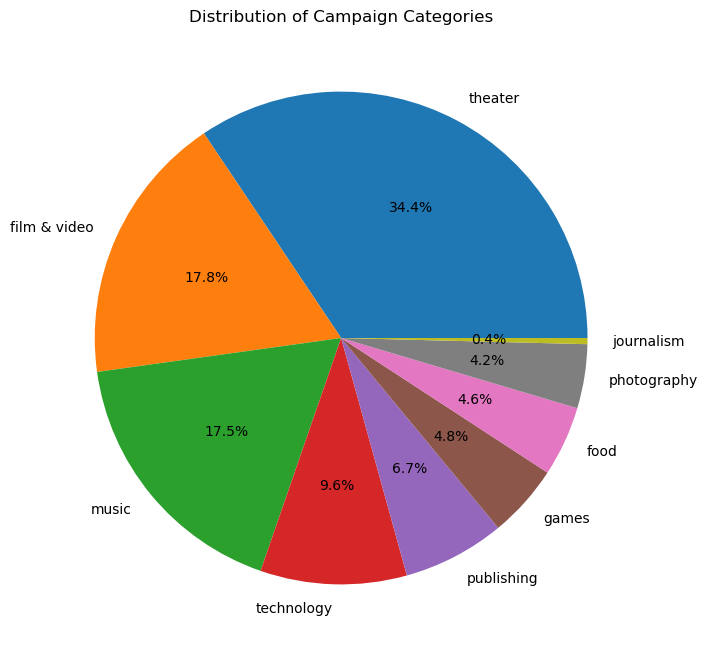

In [43]:
# Plot a pie chart to visualize the distribution of campaign categories
category_counts = crowdfunding_info_df['category'].value_counts()
category_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Distribution of Campaign Categories')
plt.ylabel('')  # Hide the y-label
plt.show()


In [8]:
# Get the number of rows and columns in the crowdfunding_info DataFrame
crowdfunding_info_df.shape


(1000, 15)

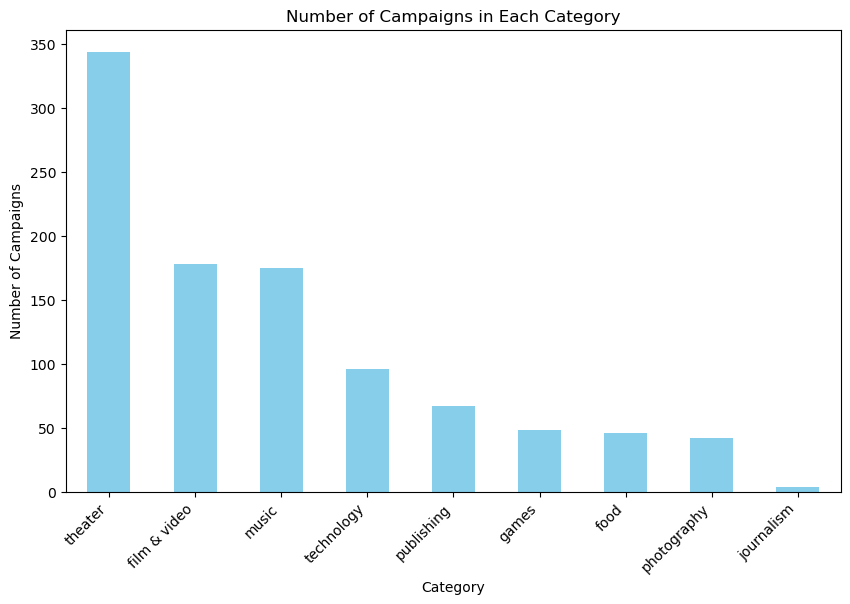

In [45]:
# Plot a bar chart to visualize the number of campaigns in each category
category_counts = crowdfunding_info_df['category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Campaigns in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45, ha='right')
plt.show()


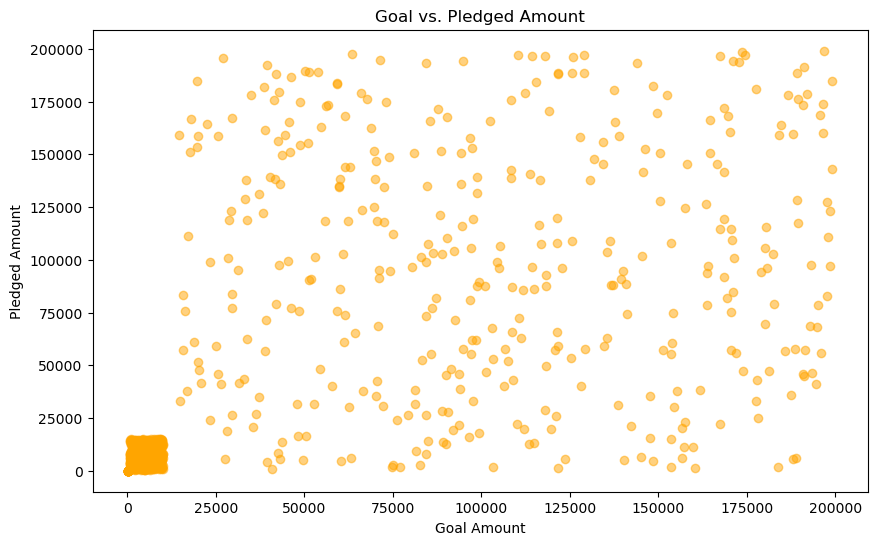

In [47]:
# Plot a scatter plot to visualize the relationship between goal and pledged amounts
plt.figure(figsize=(10, 6))
plt.scatter(crowdfunding_info_df['goal'], crowdfunding_info_df['pledged'], alpha=0.5, color='orange')
plt.title('Goal vs. Pledged Amount')
plt.xlabel('Goal Amount')
plt.ylabel('Pledged Amount')
plt.show()


### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [10]:
# Extract categories and subcategories from the "category & sub-category" column


In [11]:
# Split the "category & sub-category" column into two new columns
crowdfunding_info_df[['category', 'subcategory']] = crowdfunding_info_df['category & sub-category'].str.split('/', expand=True)

# Display first 5 rows to confirm
crowdfunding_info_df[['category', 'subcategory']].head()



,category,subcategory
0,food,food trucks
1,music,rock
2,technology,web
3,music,rock
4,theater,plays


In [12]:
# Create a DataFrame for categories with unique category IDs

# Create a DataFrame with unique categories
category_df = pd.DataFrame(crowdfunding_info_df['category'].unique(), columns=['category'])

# Add a sequential category_id starting from 1
category_df['category_id'] = range(1, len(category_df) + 1)

# Display first few rows to check
category_df.head()


,category,category_id
0,food,1
1,music,2
2,technology,3
3,theater,4
4,film & video,5


In [13]:
# # Create a DataFrame for subcategories with unique subcategory IDs

# Create a DataFrame with unique subcategories
subcategory_df = pd.DataFrame(crowdfunding_info_df['subcategory'].unique(), columns=['subcategory'])

# Add a sequential subcategory_id starting from 1
subcategory_df['subcategory_id'] = range(1, len(subcategory_df) + 1)

# Display first few rows to check
subcategory_df.head()


,subcategory,subcategory_id
0,food trucks,1
1,rock,2
2,web,3
3,plays,4
4,documentary,5


In [14]:
# Get the unique categories and subcategories in separate lists.

# Create a list of unique categories
categories = category_df['category'].tolist()

# Create a list of unique subcategories
subcategories = subcategory_df['subcategory'].tolist()

# Print both lists
print("Categories:", categories)
print("\nSubcategories:", subcategories)


Categories: ['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']

Subcategories: ['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [15]:
# Get the number of distinct values in the categories and subcategories lists.

print("Number of unique categories:", len(categories))
print("Number of unique subcategories:", len(subcategories))


Number of unique categories: 9
Number of unique subcategories: 24


In [16]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.

# Create numeric IDs for categories (1 to 9)
category_ids = np.arange(1, 10)

# Create numeric IDs for subcategories (1 to 24)
subcategory_ids = np.arange(1, 25)

# Print the arrays
print("Category IDs:", category_ids)
print("Subcategory IDs:", subcategory_ids)

Category IDs: [1 2 3 4 5 6 7 8 9]
Subcategory IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [17]:
# Use a list comprehension to add "cat" to each category_id. 

# Use a list comprehension to add "subcat" to each subcategory_id.  



# Add "cat" prefix to category IDs
cat_ids = ["cat" + str(id) for id in category_ids]

# Add "subcat" prefix to subcategory IDs
scat_ids = ["subcat" + str(id) for id in subcategory_ids]

# Print the modified IDs
print("Category IDs with Prefix:", cat_ids)
print("Subcategory IDs with Prefix:", scat_ids)


Category IDs with Prefix: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
Subcategory IDs with Prefix: ['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [18]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.

# Create the Category DataFrame
category_df = pd.DataFrame({
    "category_id": cat_ids,
    "category": categories
})

# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
# Create the Subcategory DataFrame
subcategory_df = pd.DataFrame({
    "subcategory_id": scat_ids,
    "subcategory": subcategories
})

# Display first few rows of both DataFrames
print("Category DataFrame:")
print(category_df.head(), "\n")

print("Subcategory DataFrame:")
print(subcategory_df.head())

Category DataFrame:
  category_id      category
0        cat1          food
1        cat2         music
2        cat3    technology
3        cat4       theater
4        cat5  film & video 

Subcategory DataFrame:
  subcategory_id  subcategory
0        subcat1  food trucks
1        subcat2         rock
2        subcat3          web
3        subcat4        plays
4        subcat5  documentary


In [19]:
category_df


,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [20]:
subcategory_df


,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [21]:
# Export categories_df and subcategories_df as CSV files.

# Export category DataFrame to CSV
category_df.to_csv("Resources/category.csv", index=False)

# Export subcategory DataFrame to CSV
subcategory_df.to_csv("Resources/subcategory.csv", index=False)


### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [23]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 

# Create a copy of the crowdfunding_info_df DataFrame
campaign_df = crowdfunding_info_df.copy()

# Display the first few rows to confirm
campaign_df.head()


,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [24]:
# Rename the blurb, launched_at, and deadline columns.

# Rename the required columns
campaign_df = campaign_df.rename(columns={
    "blurb": "description",
    "launched_at": "launch_date",
    "deadline": "end_date"
})

# Display first few rows to confirm changes
campaign_df.head()


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [25]:
# Convert the goal and pledged columns to a `float` data type.

# Convert columns to float
campaign_df["goal"] = campaign_df["goal"].astype(float)
campaign_df["pledged"] = campaign_df["pledged"].astype(float)

# Display first few rows to confirm changes
campaign_df.head()


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [26]:
# Check data types of all columns

campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launch_date                  int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [27]:
# Format the launched_date and end_date columns to datetime format

from datetime import datetime as dt


In [28]:
# Convert the launch_date and end_date columns from Unix timestamps to datetime format.

# Convert timestamps to datetime format
campaign_df["launch_date"] = pd.to_datetime(campaign_df["launch_date"], unit="s")
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"], unit="s")

# Display first few rows to confirm changes
campaign_df[["launch_date", "end_date"]].head()


,launch_date,end_date
0,2020-02-13 06:00:00,2021-03-01 06:00:00
1,2021-01-25 06:00:00,2021-05-25 05:00:00
2,2020-12-17 06:00:00,2021-12-30 06:00:00
3,2021-10-21 05:00:00,2022-01-17 06:00:00
4,2020-12-21 06:00:00,2021-08-23 05:00:00


In [29]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.

# Merge campaign_df with category_df on "category"
campaign_merged_df = campaign_df.merge(category_df, how="left", on="category")

# Merge with subcategory_df on "subcategory"
campaign_merged_df = campaign_merged_df.merge(subcategory_df, how="left", on="subcategory")

# Display last 10 rows to check the merge
campaign_merged_df.tail(10)


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09 05:00:00,2021-06-18 05:00:00,False,True,film & video/drama,film & video,drama,cat5,subcat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09 06:00:00,2021-05-26 05:00:00,False,True,music/rock,music,rock,cat2,subcat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14 05:00:00,2021-02-09 06:00:00,False,True,film & video/drama,film & video,drama,cat5,subcat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03 05:00:00,2021-07-08 05:00:00,False,True,photography/photography books,photography,photography books,cat8,subcat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15 06:00:00,2021-12-07 06:00:00,False,True,publishing/translations,publishing,translations,cat6,subcat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29 06:00:00,2021-05-30 05:00:00,False,True,food/food trucks,food,food trucks,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15 05:00:00,2021-11-30 06:00:00,False,False,theater/plays,theater,plays,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06 05:00:00,2021-12-10 06:00:00,False,False,theater/plays,theater,plays,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08 05:00:00,2021-04-11 05:00:00,False,True,music/indie rock,music,indie rock,cat2,subcat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30 06:00:00,2021-08-18 05:00:00,False,False,food/food trucks,food,food trucks,cat1,subcat1


In [30]:
# Drop unwanted columns

# Drop unwanted columns
campaign_merged_df = campaign_merged_df.drop(columns=["category", "subcategory", "category & sub-category"])

# Display first few rows to confirm changes
campaign_merged_df.head()


,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,False,False,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25 06:00:00,2021-05-25 05:00:00,False,True,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17 06:00:00,2021-12-30 06:00:00,False,False,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21 05:00:00,2022-01-17 06:00:00,False,False,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21 06:00:00,2021-08-23 05:00:00,False,False,cat4,subcat4


In [31]:
# Export the cleaned campaign_merged_df DataFrame as a CSV file.

# Export campaign_merged_df to CSV
campaign_merged_df.to_csv("Resources/campaign.csv", index=False)


### Extract the contacts.xlsx Data.

In [33]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=2)
contact_info_df.head()

,
0,contact_info
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [36]:
# Iterate through the contact_info_df and convert each row to a dictionary.

import json
dict_values = []

# Print out the list of values for each row.
print(dict_values)


[]


In [37]:
# path for the contacts.xlsx file
contact_info_df = pd.read_excel('D:/Crowdfunding_ETL/Resources/contacts.xlsx')

# Print the columns to check the structure
print(contact_info_df.columns)


Index(['This list of contacts was updated on 11/10/2020.'], dtype='object')


In [38]:
# Rename the column properly in contact_info_df.

# Rename the first column to 'contact_info'
contact_info_df.rename(columns={contact_info_df.columns[0]: "contact_info"}, inplace=True)

# Display column names again to confirm the fix
print(contact_info_df.columns)


Index(['contact_info'], dtype='object')


In [39]:
# Print the first few rows of 'contact_info' to check for formatting issues.

# Print first 5 rows of the contact_info column to check the format
print(contact_info_df["contact_info"].head(5))


0    Note: The contact information needs to be separated into the following columns: contact_id,  first name, last name,  and email.
1                                                                                                                                   
2                                                                                                                       contact_info
3                                           {"contact_id": 4661, "name": "Cecilia Velasco", "email": "cecilia.velasco@rodrigues.fr"}
4                                                  {"contact_id": 3765, "name": "Mariana Ellis", "email": "mariana.ellis@rossi.org"}
Name: contact_info, dtype: object


In [40]:
# Remove the first row from contact_info_df . it contains a column header instead of data.

# Drop the first row as it contains column headers instead of actual data
contact_info_df = contact_info_df.iloc[1:].reset_index(drop=True)

# Display first few rows again to confirm fix
print(contact_info_df.head(5))


                                                                               contact_info
0                                                                                          
1                                                                              contact_info
2  {"contact_id": 4661, "name": "Cecilia Velasco", "email": "cecilia.velasco@rodrigues.fr"}
3         {"contact_id": 3765, "name": "Mariana Ellis", "email": "mariana.ellis@rossi.org"}
4           {"contact_id": 4187, "name": "Sofie Woods", "email": "sofie.woods@riviere.com"}


In [41]:
# Check the first few entries in the contact_info column to understand the data format
print(contact_info_df["contact_info"].head(10))


0                                                                                             
1                                                                                 contact_info
2     {"contact_id": 4661, "name": "Cecilia Velasco", "email": "cecilia.velasco@rodrigues.fr"}
3            {"contact_id": 3765, "name": "Mariana Ellis", "email": "mariana.ellis@rossi.org"}
4              {"contact_id": 4187, "name": "Sofie Woods", "email": "sofie.woods@riviere.com"}
5    {"contact_id": 4941, "name": "Jeanette Iannotti", "email": "jeanette.iannotti@yahoo.com"}
6          {"contact_id": 2199, "name": "Samuel Sorgatz", "email": "samuel.sorgatz@gmail.com"}
7            {"contact_id": 5650, "name": "Socorro Luna", "email": "socorro.luna@hotmail.com"}
8       {"contact_id": 5889, "name": "Carolina Murray", "email": "carolina.murray@knight.com"}
9                   {"contact_id": 4842, "name": "Kayla Moon", "email": "kayla.moon@yahoo.de"}
Name: contact_info, dtype: object


In [42]:
# Convert the 'contact_info' column into dictionaries and store them in a list.

# Drop the first row 
contact_info_df = contact_info_df.drop(index=0).reset_index(drop=True)

# Reset the list before extracting data
dict_values = []

# Convert each row from a JSON string to a dictionary
for row in contact_info_df["contact_info"]:
    dict_values.append(json.loads(row))  # Convert JSON string to dictionary and store it

# Print first few extracted dictionaries to confirm
dict_values[:5]



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# Create a DataFrame from the extracted dictionaries
contact_info_cleaned_df = pd.DataFrame(dict_values)

# Check column data types
print(contact_info_cleaned_df.dtypes)


In [ ]:
# Check the data types of the contact_info_cleaned_df columns.
# Check column data types
print(contact_info_cleaned_df.dtypes)


In [ ]:
# Convert the 'name' column to a string format, clean spaces, and split into 'first_name' and 'last_name'.

# Ensure 'name' is a string and remove any leading/trailing spaces
contact_info_cleaned_df["name"] = contact_info_cleaned_df["name"].astype(str).str.strip()

# Split the 'name' column into 'first_name' and 'last_name'
contact_info_cleaned_df[["first_name", "last_name"]] = contact_info_cleaned_df["name"].str.split(" ", n=1, expand=True)

# Drop the original 'name' column
contact_info_cleaned_df = contact_info_cleaned_df.drop(columns=["name"])

# Display first few rows to confirm
contact_info_cleaned_df.head()


In [ ]:
# Create a DataFrame from the extracted dictionary values.
# Split the 'name' column into 'first_name' and 'last_name'.

# Convert extracted dictionaries into a DataFrame
contact_info_cleaned_df = pd.DataFrame(dict_values)

# Split the 'name' column into 'first_name' and 'last_name'
contact_info_cleaned_df[["first_name", "last_name"]] = contact_info_cleaned_df["name"].str.split(" ", n=1, expand=True)

# Drop the original 'name' column since we now have separate first and last names
contact_info_cleaned_df = contact_info_cleaned_df.drop(columns=["name"])

# Display first few rows to confirm the structure
contact_info_cleaned_df.head()


In [ ]:
# Check the datatypes.
contact_info_cleaned_df.dtypes


In [ ]:
# Reorder the columns
contact_info_cleaned_df = contact_info_cleaned_df[["contact_id", "first_name", "last_name", "email"]]

# Display first few rows to confirm the order
contact_info_cleaned_df.head()


In [ ]:
# Check the datatypes one more time before exporting as CSV file.

contact_info_cleaned_df.dtypes



In [ ]:
# Export the contact_info_cleaned_df DataFrame as a CSV file.

# Export contacts DataFrame to CSV with UTF-8 encoding
contact_info_cleaned_df.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

In [ ]:
###Create 'campaign_df' with the necessary columns from 'crowdfunding_info_df'


In [ ]:
# Create the campaign DataFrame by selecting relevant columns from crowdfunding_info_df
campaign_df = crowdfunding_info_df[["cf_id", "contact_id", "company_name", "blurb", "goal", "pledged", "backers_count", "country", "currency", "launched_at", "deadline"]].copy()

# Rename columns to match the specifications
campaign_df.rename(columns={
    'cf_id': 'campaign_id',
    'blurb': 'description',
    'launched_at': 'launch_date',
    'deadline': 'end_date'
}, inplace=True)

# Convert the 'goal' and 'pledged' columns to float data type
campaign_df["goal"] = campaign_df["goal"].astype(float)
campaign_df["pledged"] = campaign_df["pledged"].astype(float)

# Convert 'launch_date' and 'end_date' to datetime format
campaign_df["launch_date"] = pd.to_datetime(campaign_df["launch_date"], unit='s')
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"], unit='s')

# Display first few rows to confirm the changes
campaign_df.head()


In [ ]:
# Export the campaign_df DataFrame to CSV with UTF-8 encoding
campaign_df.to_csv("Resources/campaign.csv", encoding='utf8', index=False)
